## License Information
---

This file is distributed as part of `hvsrpy`, a Python package for horizontal-to-vertical spectral ratio processing.

    Copyright (C) 2019-2023 Joseph P. Vantassel (joseph.p.vantassel@gmail.com)

    This program is free software: you can redistribute it and/or modify
    it under the terms of the GNU General Public License as published by
    the Free Software Foundation, either version 3 of the License, or
    (at your option) any later version.

    This program is distributed in the hope that it will be useful,
    but WITHOUT ANY WARRANTY; without even the implied warranty of
    MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
    GNU General Public License for more details.

    You should have received a copy of the GNU General Public License
    along with this program.  If not, see <https: //www.gnu.org/licenses/>.
    
## About _hvsrpy_ and this notebook
---

`hvsrpy` is a Python package for performing horizontal-to-vertical spectral ratio
(HVSR) processing. `hvsrpy` was developed by Joseph P. Vantassel with
contributions from Dana M. Brannon under the supervision of Professor Brady R.
Cox at The University of Texas at Austin.

If you use _hvsrpy_ in your research or consulting, we ask you please cite the following:

>Joseph Vantassel. (2020). jpvantassel/hvsrpy: latest (Concept). Zenodo.
[http://doi.org/10.5281/zenodo.3666956](http://doi.org/10.5281/zenodo.3666956)

_Note: For software, version specific citations should be preferred to
general concept citations, such as that listed above. To generate a version
specific citation for `hvsrpy`, please use the citation tool on the `hvsrpy`
[archive](http://doi.org/10.5281/zenodo.3666956)._

The automated frequency-domain window-rejection algorithm and lognormal statistics
implemented in `hvsrpy` were developed by Tianjian Cheng under the supervision of
Professor Brady R. Cox at The University of Texas at Austin. To
recognize their original work please cite the follwing:

> Cox, B. R., Cheng, T., Vantassel, J. P., & Manuel, L. (2020). "A statistical
> representation and frequency-domain window-rejection algorithm for single-station
> HVSR measurements. Geophysical Journal International, 221(3), 2170–2183.
> https://doi.org/10.1093/gji/ggaa119


This notebook also provides automatic checking of the SESAME (2004) reliability
and clarity critera. To recognize their original work please also cite the following:

> SESAME. (2004). Guidelines for the Implementation of the H/V Spectral Ratio Technique on Ambient Vibrations
> Measurements, Processing, and Interpretation. European Commission - Research General Directorate, 62,
> European Commission - Research General Directorate.

## Getting Started
---
1. Install _hvsrpy_ and its dependencies, with `pip install hvsrpy`. If you are not familiar with `pip`, a useful tutorial can be found [here](https://jpvantassel.github.io/python3-course/#/intro/pip). __(~3 minutes)__
2. Try analyzing the four provided examples. The names of these files have been written and commented out in the section _Input Data_ for your convenience. __(~15 minutes)__
3. Try one of your own _miniseed_ files. If you wish you can confirm that, when the same settings are used, the result from _hvsrpy_ will exactly matches that of other software suites (e.g., Geopsy). If you get an error related to the _miniseed_ file this likely means it does not conform to the _SEED_ standard (refer to the [hvsrpy documentation](https://hvsrpy.readthedocs.io/en/stable/) for details). __(~15 minutes)__

Happy Processing!

In [1]:
import time
import pathlib

import numpy as np
import matplotlib.pyplot as plt

import hvsrpy
from hvsrpy import plot_tools

plt.style.use("./data/hvsrpy.mplstyle")

## Input Data

In [2]:
# Input file name (may be a relative or full path).
fnames = [["./data/UT.STN11.A2_C50.miniseed"]]
# fnames = [["./data/UT.STN11.A2_C150.miniseed"]]
# fnames = [["./data/UT.STN11.A2_C300.miniseed"]]

print(f"Number of recordings: {len(fnames)}")
for fname_set in fnames:
    for file in fname_set:
        if not pathlib.Path(file).exists():
            raise FileNotFoundError(f"file {file} not found; check spelling.")
print("All files exists.")

Number of recordings: 1
All files exists.


## Preprocessing Settings

In [3]:
preprocessing_settings = hvsrpy.settings.HvsrPreProcessingSettings()
preprocessing_settings.detrend = "linear"
preprocessing_settings.window_length_in_seconds = 150
preprocessing_settings.orient_to_degrees_from_north = 0.0
preprocessing_settings.filter_corner_frequencies_in_hz = (None, None)
preprocessing_settings.ignore_dissimilar_time_step_warning = False

print("Preprocessing Summary")
print("-"*60)
preprocessing_settings.psummary()

Preprocessing Summary
------------------------------------------------------------
hvsrpy_version                           : 2.0.0rc7
orient_to_degrees_from_north             : 0.0
filter_corner_frequencies_in_hz          : (None, None)
window_length_in_seconds                 : 150
detrend                                  : linear
preprocessing_method                     : hvsr


## Processing Settings

In [4]:
processing_settings = hvsrpy.settings.HvsrTraditionalProcessingSettings()
processing_settings.window_type_and_width = ("tukey", 0.2)
processing_settings.smoothing=dict(operator="konno_and_ohmachi",
                                   bandwidth=40,
                                   center_frequencies_in_hz=np.geomspace(0.2, 50, 200))
processing_settings.method_to_combine_horizontals = "geometric_mean"
processing_settings.handle_dissimilar_time_steps_by = "frequency_domain_resampling"

print("Processing Summary")
print("-"*60)
processing_settings.psummary()

Processing Summary
------------------------------------------------------------
hvsrpy_version                           : 2.0.0rc7
window_type_and_width                    : ('tukey', 0.2)
smoothing                                :
     operator                            : konno_and_ohmachi
     bandwidth                           : 40
     center_frequencies_in_hz            : [0.2, 0.205626908165 ... 1767550226364, 50.0]
fft_settings                             : None
handle_dissimilar_time_steps_by          : frequency_domain_resampling
processing_method                        : traditional
method_to_combine_horizontals            : geometric_mean


## Calculate HVSR

In [5]:
srecords = hvsrpy.read(fnames)
srecords = hvsrpy.preprocess(srecords, preprocessing_settings)
hvsr = hvsrpy.process(srecords, processing_settings)

## Plot HVSR

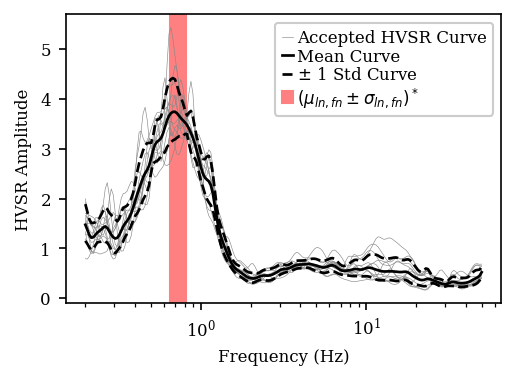

In [11]:
distribution_mc='lognormal'
distribution_fn='lognormal'
(fig, ax) = hvsrpy.plot_tools.plot_single_panel_hvsr_curves(hvsr,
                                                            distribution_mc=distribution_mc,
                                                            distribution_fn=distribution_fn)

## Results

In [12]:
print(hvsr.mean_fn_frequency(distribution=distribution_fn))
print(hvsr.std_fn_frequency(distribution=distribution_fn))
print(hvsr.mean_curve_peak(distribution=distribution_mc))

0.7233430883012713
0.11306657463663003
(0.6970721572641707, 3.743559951264813)


In [8]:
# reliability = utils.sesame_reliability(hv.meta["Window Length"], len(hv.valid_window_indices), hv.frq, hv.mean_curve(), hv.std_curve(), search_limits=(peak_f_lower, peak_f_upper), verbose=1)
# clarity = utils.sesame_clarity(hv.frq, hv.mean_curve(), hv.std_curve(), hv.std_f0_frq(distribution="normal"), search_limits=(peak_f_lower, peak_f_upper), verbose=1)